In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_df=pd.read_csv("train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.isnull().sum() #ilk adım, eksik data var mı?

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df["Age"].isnull().sum()/train_df.shape[0]*100 #eksik data oranı

19.865319865319865

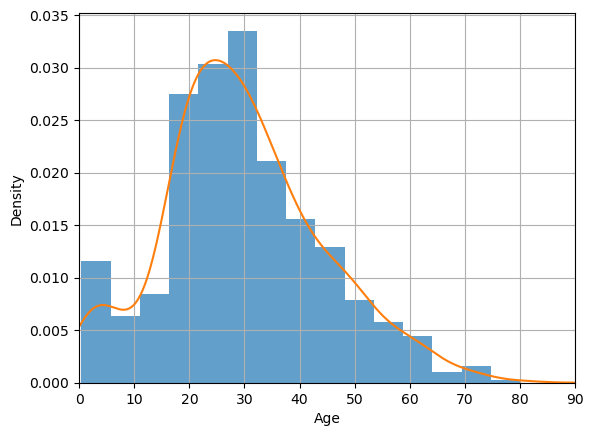

In [9]:
ax=train_df["Age"].hist(bins=15,density=True,stacked=True,alpha=0.7)
train_df["Age"].plot(kind="density")
ax.set(xlabel="Age")
plt.xlim(0,90)
plt.grid()
plt.show()

In [11]:
train_df["Age"].mean(skipna=True)#eksik verileri atlayarak ortalama

29.69911764705882

In [12]:
train_df["Age"].median(skipna=True)#eksik verileri atlayarak medyan

28.0

In [14]:
train_df["Cabin"].isnull().sum()/train_df.shape[0]*100

77.10437710437711

In [15]:
#%77 eksik bir sütunu tamamen çıkartmak daha doğru

In [16]:
train_df["Embarked"].isnull().sum()/train_df.shape[0]*100 

0.22446689113355783

In [20]:
print("% olarak binilen limanlar: (C=cherbourg, Q= Queenstown, S=Southamoton)")
print(train_df["Embarked"].value_counts()/train_df.shape[0]*100)
#eksik datayı doldururken, en çok tekrar eden limanı koymak en mantıklı olacaktır

% olarak binilen limanlar: (C=cherbourg, Q= Queenstown, S=Southamoton)
S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


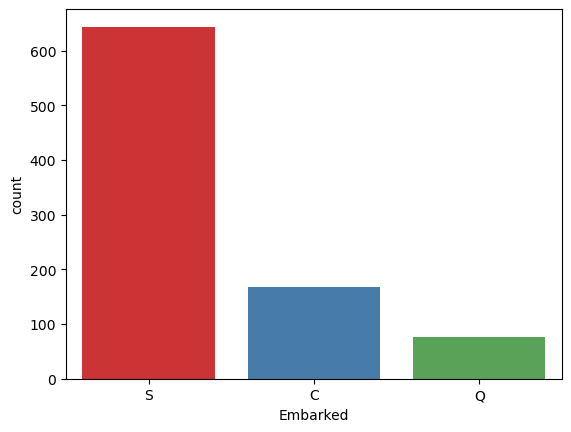

In [21]:
sns.countplot(x="Embarked",data=train_df,palette="Set1")
plt.show()

In [22]:
print("En çok kullanılan liman: ",train_df["Embarked"].value_counts().idxmax())

En çok kullanılan liman:  S


In [24]:
#uygulama için data seti kopyala
train_data=train_df.copy()

In [26]:
train_data["Age"].fillna(train_df["Age"].median(skipna=True),inplace=True)

In [27]:
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(),inplace=True)

In [28]:
train_data.drop("Cabin",axis=1,inplace=True)

In [31]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
#gereksiz değişken analizi

In [35]:
train_data["YalnizSeyahat"]=np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)
train_data.drop("SibSp",axis=1,inplace=True)
train_data.drop("Parch",axis=1,inplace=True)

In [37]:
train_data.head()
#sibling/spouse ve parent/children sütunlarını birleştirip yalnız seyahat etme sütununa çevirdik

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,YalnizSeyahat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [38]:
train_data=pd.get_dummies(train_data,columns=["Pclass","Embarked","Sex"],drop_first=True)

In [39]:
train_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,YalnizSeyahat,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,0,1,1


In [40]:
train_data.drop("PassengerId",axis=1,inplace=True)
train_data.drop("Name",axis=1,inplace=True)
train_data.drop("Ticket",axis=1,inplace=True)

In [41]:
train_data.head()

,Survived,Age,Fare,YalnizSeyahat,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [42]:
train_data.shape

(891, 9)

In [43]:
print("train data toplam veri: ",train_data.shape[0])

train data toplam veri:  891


In [44]:
col_names=train_data.columns
col_names

Index(['Survived', 'Age', 'Fare', 'YalnizSeyahat', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

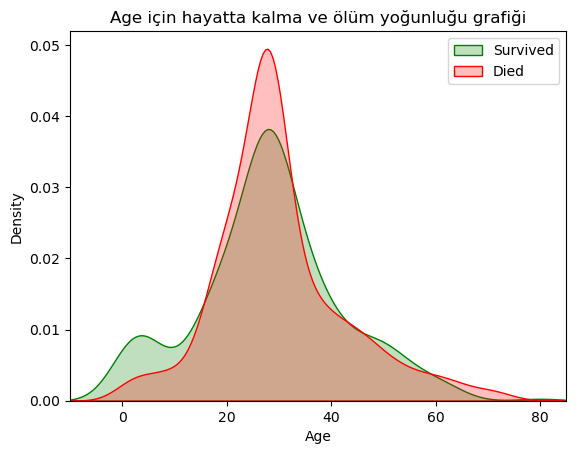

In [45]:
#age için EDA
ax=sns.kdeplot(train_data["Age"][train_data.Survived==1],color="green",shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived==0],color="red",shade=True)

plt.legend(["Survived","Died"])
plt.title("Age için hayatta kalma ve ölüm yoğunluğu grafiği")
ax.set(xlabel="Age")
plt.xlim(-10,85)
plt.show()

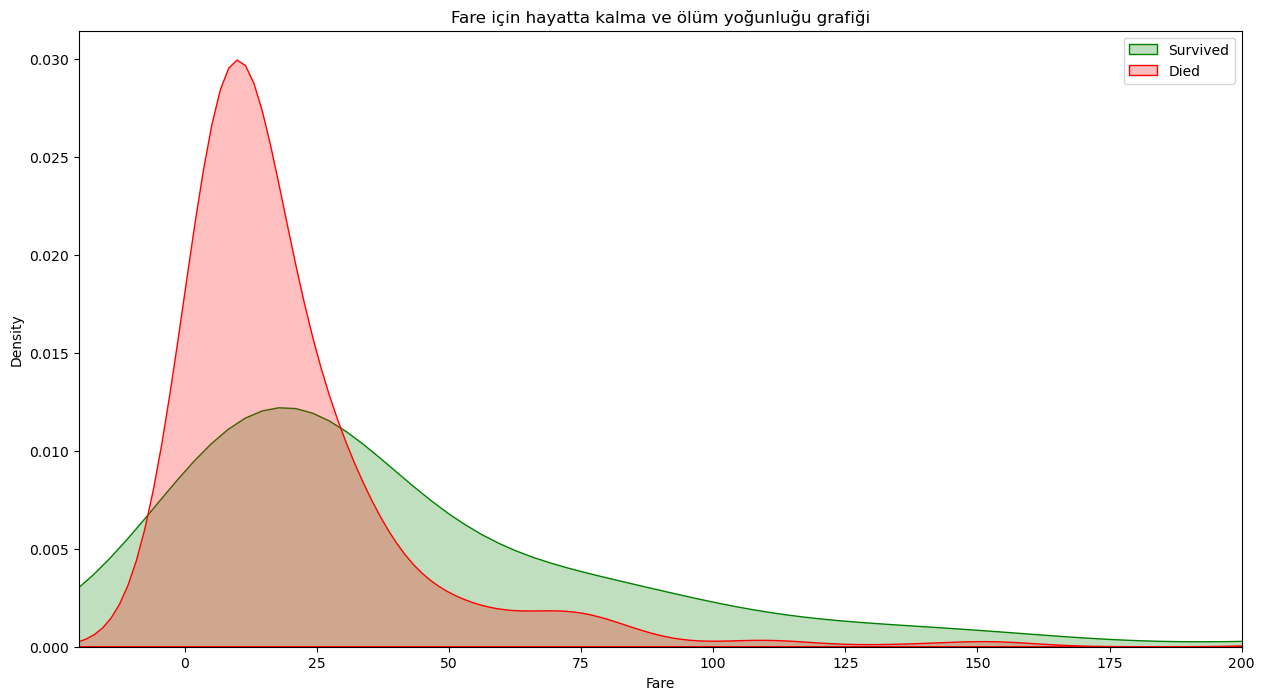

In [46]:
#fare için EDA
plt.figure(figsize=(15,8))
ax=sns.kdeplot(train_data["Fare"][train_data.Survived==1],color="green",shade=True)
ax=sns.kdeplot(train_data["Fare"][train_data.Survived==0],color="red",shade=True)

plt.legend(["Survived","Died"])
plt.title("Fare için hayatta kalma ve ölüm yoğunluğu grafiği")
ax.set(xlabel="Fare")
plt.xlim(-20,200)
plt.show()

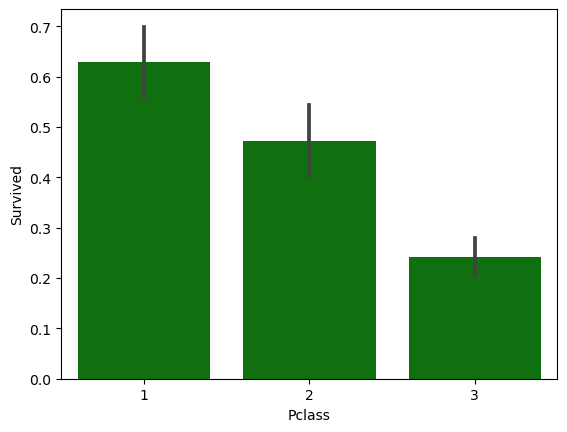

In [47]:
#class için EDA
sns.barplot("Pclass","Survived",data=train_df,color="green")
plt.show()

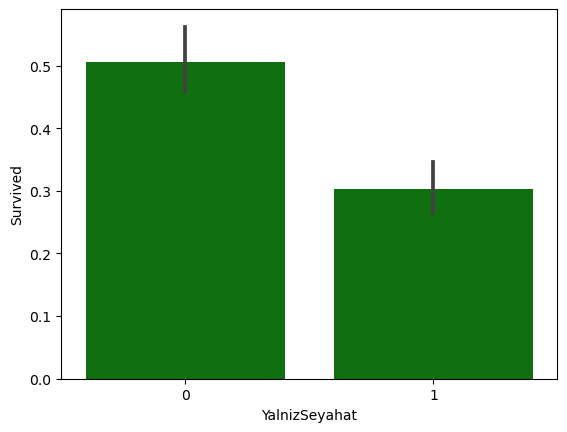

In [48]:
#yalnız seyahat için EDA
sns.barplot("YalnizSeyahat","Survived",data=train_data,color="green")
plt.show()

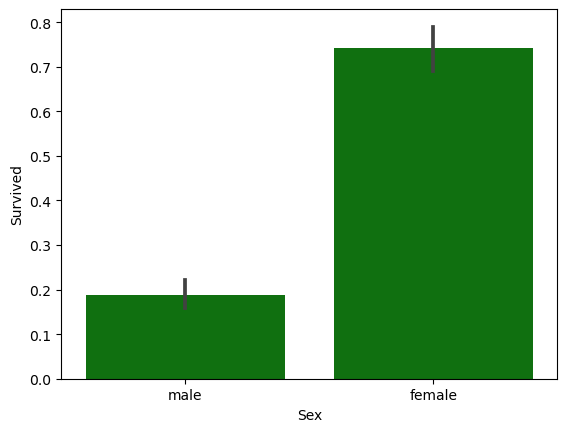

In [49]:
#cinsiyet için EDA
sns.barplot("Sex","Survived",data=train_df,color="green")
plt.show()

In [50]:
#input-output ayrımı

In [51]:
y=train_data["Survived"]

In [52]:
train_data.drop("Survived",axis=1,inplace=True)

In [54]:
train_data.describe()

,Age,Fare,YalnizSeyahat,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.602694,0.206510,0.551066,0.086420,0.725028,0.647587
std,13.019697,49.693429,0.489615,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,35.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
cols=train_data.columns
cols

Index(['Age', 'Fare', 'YalnizSeyahat', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)

In [58]:
type(train_data)

numpy.ndarray

In [59]:
train_data=pd.DataFrame(train_data,columns=[cols])

In [60]:
train_data.head()

,Age,Fare,YalnizSeyahat,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data,y,test_size=0.2,random_state=2)

In [66]:
#lojistik regresyon modeli oluşturma

In [67]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver="liblinear",random_state=0)

In [68]:
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [69]:
#tahmin
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [72]:
#sigmoid fonksiyonuna adapte et
logreg.predict_proba(X_test)[:,0]#0'a bakıyorum, yani 0.5'in üstü değerler 0 yani ölü

array([0.71566808, 0.9106929 , 0.19335168, 0.9164709 , 0.4411967 ,
       0.9240331 , 0.84048156, 0.91693815, 0.70595606, 0.74276278,
       0.78893909, 0.14453791, 0.33297568, 0.9164709 , 0.9164709 ,
       0.45089004, 0.88101552, 0.94688199, 0.35196474, 0.93866358,
       0.47430005, 0.39529048, 0.89554799, 0.45995316, 0.86166856,
       0.36502106, 0.31316525, 0.67424763, 0.92108639, 0.84633668,
       0.90910207, 0.93253257, 0.3817079 , 0.64973872, 0.62073069,
       0.482271  , 0.13966436, 0.86022102, 0.92123975, 0.79231663,
       0.93438701, 0.93697623, 0.48106958, 0.90051774, 0.91065185,
       0.49977922, 0.12198731, 0.92116649, 0.87628364, 0.22522835,
       0.92122502, 0.75004478, 0.75210502, 0.73200982, 0.78249044,
       0.71994097, 0.40259856, 0.9106273 , 0.94836357, 0.92673265,
       0.27984974, 0.64800631, 0.93060971, 0.92130141, 0.36977444,
       0.92791178, 0.20150962, 0.76349335, 0.86135874, 0.89868392,
       0.47258877, 0.9664195 , 0.37803808, 0.9212493 , 0.50059

In [74]:
logreg.predict_proba(X_test)[:,1]#1'e bakıyorum yani o.5'in üstü değerler 1 yani yaşıyor

array([0.28433192, 0.0893071 , 0.80664832, 0.0835291 , 0.5588033 ,
       0.0759669 , 0.15951844, 0.08306185, 0.29404394, 0.25723722,
       0.21106091, 0.85546209, 0.66702432, 0.0835291 , 0.0835291 ,
       0.54910996, 0.11898448, 0.05311801, 0.64803526, 0.06133642,
       0.52569995, 0.60470952, 0.10445201, 0.54004684, 0.13833144,
       0.63497894, 0.68683475, 0.32575237, 0.07891361, 0.15366332,
       0.09089793, 0.06746743, 0.6182921 , 0.35026128, 0.37926931,
       0.517729  , 0.86033564, 0.13977898, 0.07876025, 0.20768337,
       0.06561299, 0.06302377, 0.51893042, 0.09948226, 0.08934815,
       0.50022078, 0.87801269, 0.07883351, 0.12371636, 0.77477165,
       0.07877498, 0.24995522, 0.24789498, 0.26799018, 0.21750956,
       0.28005903, 0.59740144, 0.0893727 , 0.05163643, 0.07326735,
       0.72015026, 0.35199369, 0.06939029, 0.07869859, 0.63022556,
       0.07208822, 0.79849038, 0.23650665, 0.13864126, 0.10131608,
       0.52741123, 0.0335805 , 0.62196192, 0.0787507 , 0.49940

In [76]:
from sklearn.metrics import accuracy_score
print("accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred)))

accuracy score: 0.7598
